# StateFarm Driver Classification v2

In [1]:
!pwd

/home/ubuntu/machine-learning/FastAI-Course/Lessons


## Import packages

In [2]:
%matplotlib inline
import keras
import keras.models as kmodels
import keras.layers as klayers
import bcolz
import numpy as np

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [3]:
import utils

## Structure Training / Validation / Test Data

Note : I had done a lot of the structuring for this already, hence using "sample2" folder

Create a sample of the data. ie /sample/train and /sample/valid

In [46]:
!mkdir ./data/sample2
!mkdir ./data/sample2/train
!mkdir ./data/sample2/valid

Create the class directories in sample2/train and sample2/valid

In [56]:
import os, shutil
import glob

dataRoot = './data/'
for d in glob.glob(dataRoot + 'train/c?'):
    #print(dataRoot+'sample2/train/'+d[-2:])
    os.mkdir(dataRoot+'sample2/train/'+d[-2:])
    os.mkdir(dataRoot+'sample2/valid/'+d[-2:])

Move some random images over to sample2 folder

In [64]:
%cd ./data/train

/home/ubuntu/machine-learning/FastAI-Course/Lessons/data/train


In [41]:
from shutil import copyfile

In [68]:
g = glob.glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(1500): copyfile(shuf[i], '../sample2/train/' + shuf[i])

In [69]:
g = glob.glob('c?/*.jpg')
shuf = np.random.permutation(g)
for i in range(1000): copyfile(shuf[i], '../sample2/valid/' + shuf[i])

In [71]:
%cd ../..

/home/ubuntu/machine-learning/FastAI-Course/Lessons


In [4]:
!tree -d data

data
├── sample
│   ├── test
│   ├── train
│   │   ├── c0
│   │   ├── c1
│   │   ├── c2
│   │   ├── c3
│   │   ├── c4
│   │   ├── c5
│   │   ├── c6
│   │   ├── c7
│   │   ├── c8
│   │   └── c9
│   └── valid
│       ├── c0
│       ├── c1
│       ├── c2
│       ├── c3
│       ├── c4
│       ├── c5
│       ├── c6
│       ├── c7
│       ├── c8
│       └── c9
├── sample2
│   ├── train
│   │   ├── c0
│   │   ├── c1
│   │   ├── c2
│   │   ├── c3
│   │   ├── c4
│   │   ├── c5
│   │   ├── c6
│   │   ├── c7
│   │   ├── c8
│   │   └── c9
│   └── valid
│       ├── c0
│       ├── c1
│       ├── c2
│       ├── c3
│       ├── c4
│       ├── c5
│       ├── c6
│       ├── c7
│       ├── c8
│       └── c9
├── subset
│   ├── test
│   ├── train
│   │   ├── c0
│   │   ├── c1
│   │   ├── c2
│   │   ├── c3
│   │   ├── c4
│   │   ├── c5
│   │   ├── c6
│   │   ├── c7
│   │   ├── c8
│   │   └── c9
│   └── valid
│       ├── c0
│       ├── c1
│       ├── c2
│       ├── c3
│       ├── c4
│       ├── c5
│       ├──

In [5]:
!ls -l data/sample/train/c0 | wc -l
!ls -l data/sample/valid/c0 | wc -l
!ls -l data/sample/test | wc -l
!ls -l data/train/c0 | wc -l
!ls -l data/train/* | wc -l
!ls -l data/test | wc -l

101
101
101
2490
22453
79727


In [4]:
dataPath = './data/sample2/'

## Classes in the data

c0: safe driving

c1: texting - right

c2: talking on the phone - right

c3: texting - left

c4: talking on the phone - left

c5: operating the radio

c6: drinking

c7: reaching behind

c8: hair and makeup

c9: talking to passenger

In [5]:
classesInd = ['safe driving','texting - right','talking on the phone - right','texting - left','talking on the phone - left','operating the radio','drinking','reaching behind','hair and makeup','talking to passenger']

## Create batches from images

In [17]:
??utils.get_batches

In [10]:
batch_size = 64
batches = utils.get_batches(dataPath+'train', batch_size=batch_size)
val_batches = utils.get_batches(dataPath+'valid', batch_size=batch_size)

Found 1500 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Simple Linear Model

In [8]:
model = kmodels.Sequential([
        klayers.normalization.BatchNormalization(axis=1, input_shape=(3,224,224)),
        klayers.Flatten(),
        klayers.Dense(10, activation='softmax')
    ])

In [9]:
batches.nb_sample

1500

In [10]:
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(
    batches, batches.nb_sample,
    nb_epoch=2,
    validation_data=val_batches, nb_val_samples=val_batches.nb_sample
)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 13.0109 - acc: 0.1460 - val_loss: 13.5658 - val_acc: 0.1550
Epoch 2/2
1500/1500 [==============================] - 26s - loss: 13.0200 - acc: 0.1853 - val_loss: 13.5309 - val_acc: 0.1580


In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNormal(None, 3, 224, 224)   6           batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 150528)        0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            1505290     flatten_1[0][0]                  
Total params: 1505296
____________________________________________________________________________________________________


Accuracy clearly isn't that high, about 10% so it's probably just always predicting just a few classes.. Let's check :

In [12]:
batches.N
#??np.round
#??model.predict_generator
numToPredict = batches.N
predictions = model.predict_generator(batches, numToPredict)
np.round(predictions[:10], 2)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]], dtype=float32)

So clearly just always predicting class 6.. lets lower the learning rate

In [13]:
model.compile(keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(
    batches, batches.nb_sample,
    nb_epoch=2,
    validation_data=val_batches, nb_val_samples=val_batches.nb_sample
)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 13.0633 - acc: 0.1887 - val_loss: 13.3771 - val_acc: 0.1680
Epoch 2/2
1500/1500 [==============================] - 24s - loss: 13.0340 - acc: 0.1860 - val_loss: 13.1434 - val_acc: 0.1780


In [14]:
predictions = model.predict_generator(batches, batches.N)
np.round(predictions[:10], 2)

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)

A little better.. reduce the learning rate now that we're heading in the right direction

In [15]:
model.optimizer.lr=0.001

In [16]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/4
1500/1500 [==============================] - 32s - loss: 12.8690 - acc: 0.1887 - val_loss: 13.4891 - val_acc: 0.1590
Epoch 2/4
1500/1500 [==============================] - 25s - loss: 12.7536 - acc: 0.1973 - val_loss: 13.2345 - val_acc: 0.1690
Epoch 3/4
1500/1500 [==============================] - 24s - loss: 12.7969 - acc: 0.1967 - val_loss: 13.1484 - val_acc: 0.1760
Epoch 4/4
1500/1500 [==============================] - 26s - loss: 12.6291 - acc: 0.2047 - val_loss: 13.1364 - val_acc: 0.1720


This isn't looking promising.. Our loss is oscillating so our learning rate is probably too high. We'll try to decrease it and see try one last time..

In [17]:
model.optimizer.lr=0.0001

In [18]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/4
1500/1500 [==============================] - 32s - loss: 12.6009 - acc: 0.2107 - val_loss: 13.1167 - val_acc: 0.1750
Epoch 2/4
1500/1500 [==============================] - 25s - loss: 12.5356 - acc: 0.2160 - val_loss: 12.7251 - val_acc: 0.1990
Epoch 3/4
1500/1500 [==============================] - 24s - loss: 12.7240 - acc: 0.2053 - val_loss: 12.9589 - val_acc: 0.1890
Epoch 4/4
1500/1500 [==============================] - 25s - loss: 12.3681 - acc: 0.2273 - val_loss: 12.7824 - val_acc: 0.1980


Okay, so our model over fitting pretty heavily..

## Overcoming Overfitting

Techniques to avoid overfitting : 
1. Add more data
2. Use data augmentation
3. Use architectures that generalize well
4. Add regularization
5. Reduce architecture complexity.

## Add Regularization

Regularization adds the sum of all weights in a layer to the loss function. L2 adds the squares of all the weights, therefore weights much larger than 1 get penalized more.


Intuitively this helps against overfitting because your model can depend as heavily on certain weights to dictate the output, ie VERY specific weights won't be trained to match VERY specific points / conditions in ur training set.

In [20]:
l2 = keras.regularizers.l2
model = kmodels.Sequential([
        klayers.normalization.BatchNormalization(axis=1, input_shape=(3,224,224)),
        klayers.Flatten(),
        klayers.Dense(10, activation='softmax', W_regularizer=l2(0.01))
    ])
model.compile(keras.optimizers.Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 32s - loss: 4.7176 - acc: 0.2767 - val_loss: 8.1813 - val_acc: 0.2830
Epoch 2/2
1500/1500 [==============================] - 25s - loss: 1.7006 - acc: 0.5847 - val_loss: 1.7382 - val_acc: 0.6410


Still underfitting (training_acc < val_acc), lets continue to train.. Used very small lr to get us started, now increase rate a little bit.

In [21]:
model.optimizer.lr=0.001
model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/4
1500/1500 [==============================] - 32s - loss: 0.8343 - acc: 0.7993 - val_loss: 0.8840 - val_acc: 0.7460
Epoch 2/4
1500/1500 [==============================] - 24s - loss: 0.4720 - acc: 0.9240 - val_loss: 0.6472 - val_acc: 0.8120
Epoch 3/4
1500/1500 [==============================] - 24s - loss: 0.3631 - acc: 0.9560 - val_loss: 0.4526 - val_acc: 0.8610
Epoch 4/4
1500/1500 [==============================] - 24s - loss: 0.3116 - acc: 0.9813 - val_loss: 0.3720 - val_acc: 0.8960


This seems to be kinda high accuracy for such a simple model on a complicated data set.. Gonna evaluate it against other unseen data to see how well it generalizes.

In [24]:
rnd_batches = utils.get_batches(dataPath+'../train', batch_size=batch_size*2, shuffle=True)
rnd_batches.nb_sample

Found 22424 images belonging to 10 classes.


22424

In [26]:
val_res = model.evaluate_generator(rnd_batches, rnd_batches.nb_sample)
val_res

[0.39966826935644623, 0.8912772030180538]

Okay.. uhh idk but this is a weirdly strong model?

In [30]:
model.save_weights('./statefarm-1dense-v2.h5')

Load the model back up..

In [5]:
model = kmodels.Sequential([
        klayers.normalization.BatchNormalization(axis=1, input_shape=(3,224,224)),
        klayers.Flatten(),
        klayers.Dense(10, activation='softmax', W_regularizer=keras.regularizers.l2(0.01))
    ])
model.load_weights('./statefarm-1dense-v2.h5')

Grab a few images and compare predictions with actual labels..

In [36]:
gen = keras.preprocessing.image.ImageDataGenerator()
predBatch = gen.flow_from_directory('./data/train', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=8)
imgs,labels = next(predBatch)

Found 22424 images belonging to 10 classes.


In [37]:
labs = [arr.tolist().index(1) for arr in labels]

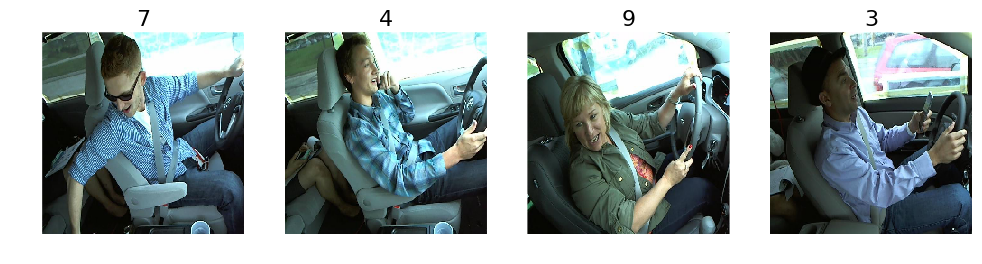

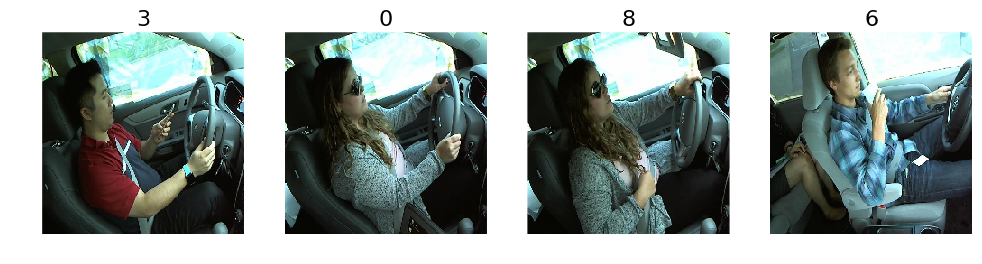

In [38]:
utils.plots(imgs[:4], titles=labs[:4])
utils.plots(imgs[4:], titles=labs[4:])

In [39]:
predictions = model.predict(imgs, True)
np.round(predictions, 2)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.99,  0.01,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.01,  0.98,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.99],
       [ 0.  ,  0.  ,  0.  ,  0.99,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.01,  0.  ,  0.  ,  0.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.02,  0.21,  0.01,  0.  ,  0.01,  0.  ,  0.01,  0.  ,  0.68,  0.06],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ]], dtype=float32)

In [40]:
[arr.index(max(arr)) for arr in predictions.tolist()]

[7, 4, 9, 3, 3, 0, 8, 6]

Try with some of the test data..

In [60]:
gen = keras.preprocessing.image.ImageDataGenerator()

testBatch = gen.flow_from_directory('./data/train', target_size=(224,224),
                class_mode=None, shuffle=True, batch_size=8)
imgs = next(testBatch)

Found 22424 images belonging to 10 classes.


In [61]:
predictions = model.predict(imgs, True)
np.round(predictions, 2)

array([[ 0.  ,  0.79,  0.  ,  0.  ,  0.  ,  0.14,  0.03,  0.  ,  0.01,  0.01],
       [ 0.01,  0.03,  0.22,  0.  ,  0.02,  0.  ,  0.56,  0.02,  0.03,  0.12],
       [ 0.03,  0.  ,  0.  ,  0.14,  0.01,  0.  ,  0.  ,  0.  ,  0.01,  0.81],
       [ 0.  ,  0.22,  0.73,  0.  ,  0.03,  0.  ,  0.  ,  0.01,  0.  ,  0.01],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.98,  0.01,  0.01,  0.  ],
       [ 0.98,  0.  ,  0.  ,  0.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.83,  0.06,  0.02,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.07,  0.01]], dtype=float32)

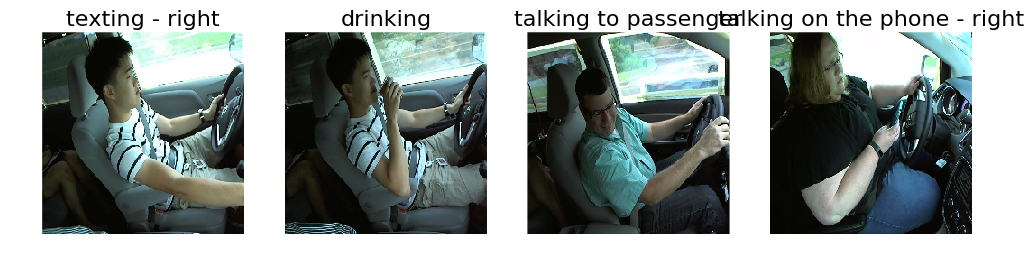

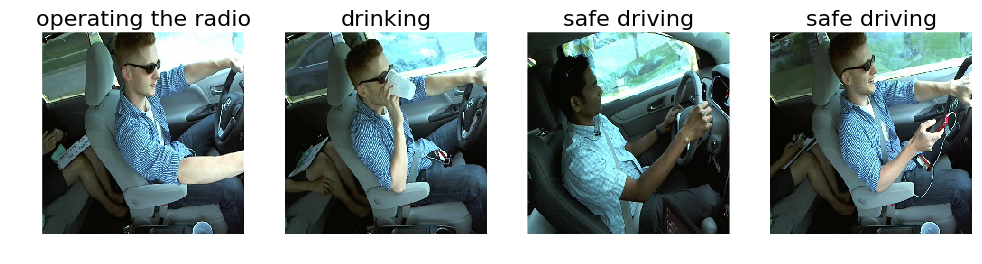

In [62]:
classNums = [arr.index(max(arr)) for arr in predictions.tolist()]
labs = [classesInd[cn] for cn in classNums]
utils.plots(imgs[:4], titles=labs[:4])
utils.plots(imgs[4:], titles=labs[4:])

## Adding a hidden Layer

In [ ]:
l2 = keras.regularizers.l2
model = kmodels.Sequential([
        klayers.normalization.BatchNormalization(axis=1, input_shape=(3,224,224)),
        klayers.Flatten(),
        klayers.Dense(10, activation='relu', W_regularizer=l2(0.01))
        klayers.normalization.BatchNormalization(),
        klayers.Dense(10, activation='softmax', W_regularizer=l2(0.01))
    ])
model.compile(keras.optimizers.Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

## Adding Convolutional Layers

In [11]:
model = kmodels.Sequential([
        klayers.normalization.BatchNormalization(axis=1, input_shape=(3,224,224)),
        klayers.Convolution2D(32,3,3, activation="relu"),
        klayers.convolutional.MaxPooling2D((3,3)),
        klayers.normalization.BatchNormalization(axis=1),
        klayers.Convolution2D(32,3,3, activation="relu"),
        klayers.convolutional.MaxPooling2D((3,3)),
        klayers.normalization.BatchNormalization(axis=1),
        klayers.Flatten(),
        klayers.Dense(200, activation='relu'),
        klayers.Dense(10, activation='softmax', W_regularizer=keras.regularizers.l2(0.01))
    ])

In [12]:
model.compile(keras.optimizers.Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/2
1500/1500 [==============================] - 39s - loss: 2.2140 - acc: 0.3607 - val_loss: 2.4187 - val_acc: 0.2110
Epoch 2/2
1500/1500 [==============================] - 28s - loss: 0.8166 - acc: 0.8653 - val_loss: 1.8484 - val_acc: 0.2820


In [13]:
model.optimizer.lr = 0.001
model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
1500/1500 [==============================] - 36s - loss: 0.4021 - acc: 0.9620 - val_loss: 1.5595 - val_acc: 0.4430
Epoch 2/4
1500/1500 [==============================] - 28s - loss: 0.2870 - acc: 0.9913 - val_loss: 1.4618 - val_acc: 0.5090
Epoch 3/4
1500/1500 [==============================] - 35s - loss: 0.2339 - acc: 0.9987 - val_loss: 1.2985 - val_acc: 0.5980
Epoch 4/4
1500/1500 [==============================] - 29s - loss: 0.2111 - acc: 1.0000 - val_loss: 1.2528 - val_acc: 0.5940


In [14]:
gen = keras.preprocessing.image.ImageDataGenerator()

testBatch = gen.flow_from_directory('./data/train', target_size=(224,224),
                class_mode=None, shuffle=True, batch_size=8)
imgs = next(testBatch)

Found 22424 images belonging to 10 classes.


In [15]:
predictions = model.predict(imgs, True)
np.round(predictions, 2)

array([[ 0.17,  0.03,  0.01,  0.35,  0.08,  0.13,  0.05,  0.02,  0.06,  0.11],
       [ 0.01,  0.  ,  0.02,  0.  ,  0.02,  0.01,  0.62,  0.02,  0.3 ,  0.  ],
       [ 0.58,  0.01,  0.03,  0.01,  0.06,  0.1 ,  0.02,  0.02,  0.05,  0.13],
       [ 0.04,  0.  ,  0.01,  0.01,  0.05,  0.83,  0.01,  0.01,  0.02,  0.03],
       [ 0.34,  0.02,  0.05,  0.13,  0.2 ,  0.05,  0.05,  0.08,  0.04,  0.03],
       [ 0.2 ,  0.03,  0.02,  0.1 ,  0.19,  0.15,  0.04,  0.05,  0.15,  0.07],
       [ 0.38,  0.01,  0.14,  0.01,  0.18,  0.08,  0.04,  0.03,  0.07,  0.05],
       [ 0.35,  0.01,  0.02,  0.02,  0.11,  0.19,  0.02,  0.08,  0.14,  0.06]], dtype=float32)

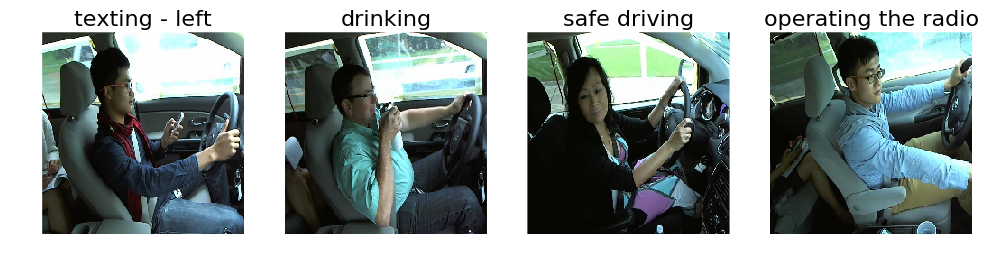

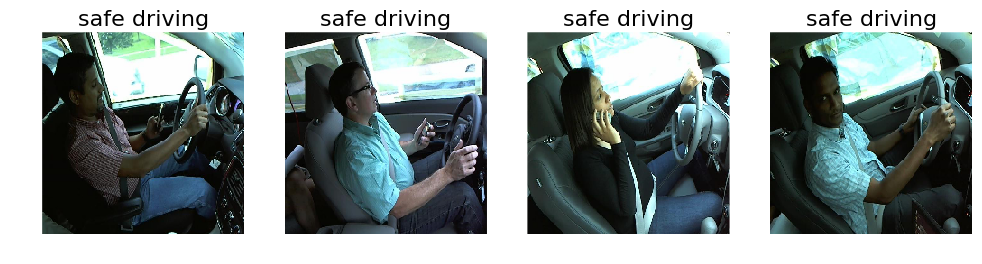

In [16]:
classNums = [arr.index(max(arr)) for arr in predictions.tolist()]
labs = [classesInd[cn] for cn in classNums]
utils.plots(imgs[:4], titles=labs[:4])
utils.plots(imgs[4:], titles=labs[4:])

## Using VGG Convolutional Layers

In [3]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________